In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
glob.glob('./patientData/*')
foldername = './patientData/'
filename_patient = './patientData/patientAS14.01.csv'
filename_all = './dataset_mood_smartphone.csv'


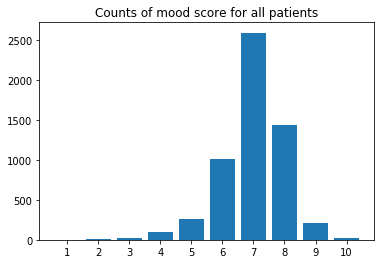

In [3]:
df = pd.read_csv(filename_all)

values = range(1,11)
counts = []
for i in values:
    count = df[df['variable'] == 'mood'].loc[df['value'] == i].shape[0]
    counts.append(count)

y_pos = np.arange(len(values))
 
# Create bars
plt.bar(y_pos, counts)
# Create names on the x-axis
plt.xticks(y_pos, values)
plt.title('Counts of mood score for all patients')
# Show graphic
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

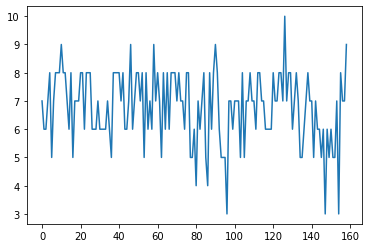

<Figure size 720x345.6 with 0 Axes>

In [4]:
mood_list = list(df[df['variable']=='mood'].loc[df['id'] == 'AS14.02']['value'])
plt.plot(mood_list)
plt.figure(figsize=[10, 4.8])
plt.show

In [5]:
def is_nan(x):
    '''
    Checks if x is nan or not.
    Taken from https://stackoverflow.com/questions/944700/how-can-i-check-for-nan-values.

    :param x: any type of item to check for if it is nan type

    Returns True if it is nan type, false if not.
    '''

    return (x is np.nan or x != x)

def get_score_for_previous_day(df, column_name, day=-1):
    """
    Generates list of scores and list of moods for the metric in column name for one patient. 
    The scores are taken from one day before as default.
    """
    scores = []
    moods = []
    for index, row in df.iterrows():
        if index < abs(day):
            continue
        if all([int(row['day']) == (int(df.at[index+day, 'day']) - day),
                row['month'] == df.at[index+day, 'month'],
                not is_nan(df.at[index+day, column_name]),
                not is_nan(df.at[index, 'mood'])]):
            scores.append(df.at[index+day, column_name])
            moods.append(df.at[index, 'mood'])
    return scores, moods

def get_scores_moods_all_patients(foldername, column_name, day=-1):
    """
    Loops through folder to get scores for all patients. 
    Generates list of scores and list of moods for the metric in column name. 
    The scores are taken from one day before as default.
    """
    scores = []
    moods = []
    for filename_patient in glob.glob(foldername+'*'):
        # Read in df for patient
        df = pd.read_csv(filename_patient)
        # Edit dataframe
        df['month'] = df.apply(lambda row: row.time[5:7], axis=1)
        df['day'] = df.apply(lambda row: row.time[8:10], axis=1)
        df['call'].fillna(0, inplace=True)
        df['sms'].fillna(0, inplace=True)
        # Get scores for patient
        scores_patient, moods_patient = get_score_for_previous_day(df, column_name, day=day)
        # Add to list of all patients
        scores += scores_patient
        moods += moods_patient
    return scores, moods

In [6]:
def get_plots(foldername, column_name, label_name=''):
    scores_1, moods_1= get_scores_moods_all_patients(foldername, column_name, day=-1)
    scores_2, moods_2= get_scores_moods_all_patients(foldername, column_name, day=-2)
    scores_3, moods_3= get_scores_moods_all_patients(foldername, column_name, day=-3)
    scores_4, moods_4= get_scores_moods_all_patients(foldername, column_name, day=-4)
    scores_5, moods_5= get_scores_moods_all_patients(foldername, column_name, day=-5)

    fig, axs = plt.subplots(2, 3)
    axs[0, 0].scatter(moods_1, scores_1, s=3)
    axs[0, 0].set_title('Day -1')
    axs[0, 1].scatter(moods_2, scores_2, s=3)
    axs[0, 1].set_title('Day -2')
    axs[0, 2].scatter(moods_3, scores_3, s=3)
    axs[0, 2].set_title('Day -3')
    axs[1, 0].scatter(moods_4, scores_4, s=3)
    axs[1, 0].set_title('Day -4')
    axs[1, 1].scatter(moods_5, scores_5, s=3)
    axs[1, 1].set_title('Day -5')
    axs[1, 2].axis('off')

    for ax in axs.flat:
        ax.set(xlabel='Mood score', ylabel=label_name + ' score')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    fig.suptitle(label_name, fontsize=14)

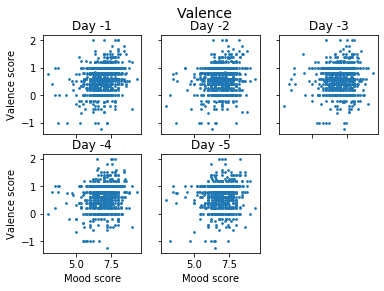

In [7]:
get_plots(foldername, 'circumplex.valence', 'Valence')

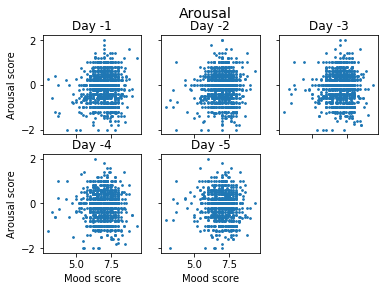

In [8]:
get_plots(foldername, 'circumplex.arousal', 'Arousal')

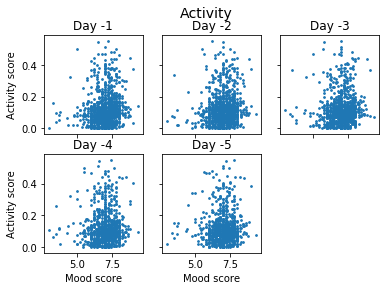

In [9]:
get_plots(foldername, 'activity', 'Activity')

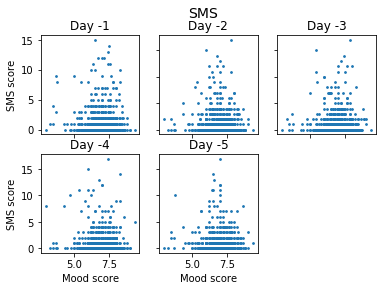

In [10]:
get_plots(foldername, 'sms', 'SMS')

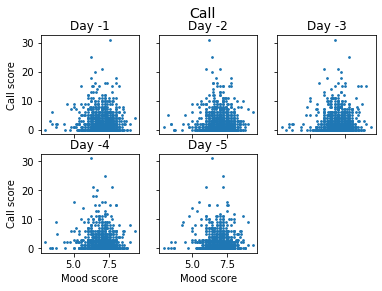

In [11]:
get_plots(foldername, 'call', 'Call')

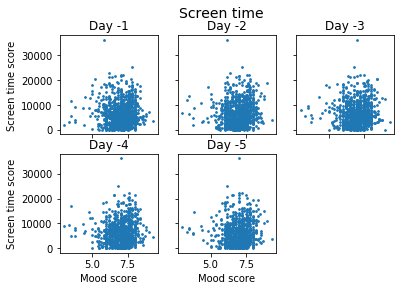

In [12]:
get_plots(foldername, 'screen', 'Screen time')

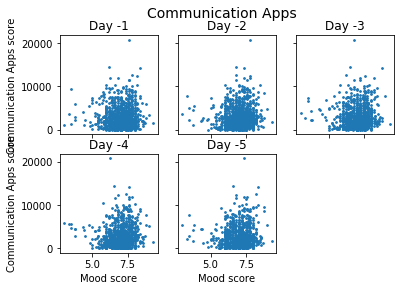

In [13]:
get_plots(foldername, 'appCat.communication', 'Communication Apps')

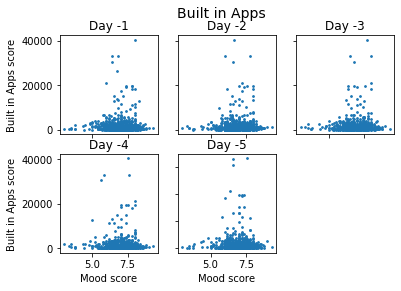

In [14]:
get_plots(foldername, 'appCat.builtin', 'Built in Apps')

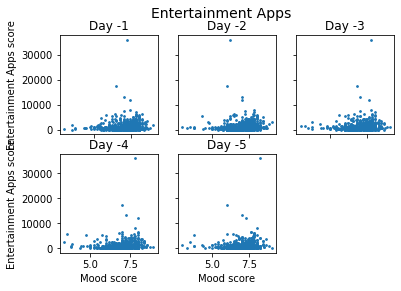

In [15]:
get_plots(foldername, 'appCat.entertainment', 'Entertainment Apps')

In [16]:
#get_plots(foldername, 'appCat.finance', 'Finance Apps')
# Not working

In [17]:
#get_plots(foldername, 'appCat.office', 'Office Apps')
# Not working

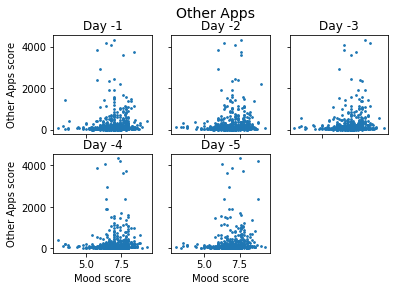

In [18]:
get_plots(foldername, 'appCat.other', 'Other Apps')

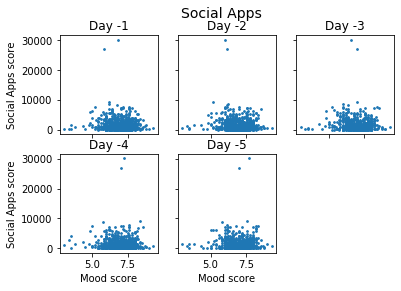

In [19]:
get_plots(foldername, 'appCat.social', 'Social Apps')

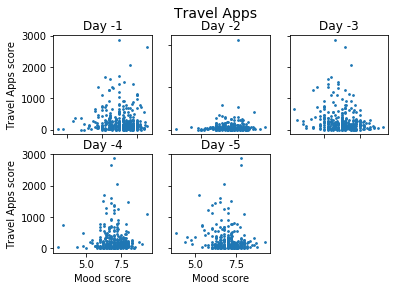

In [20]:
get_plots(foldername, 'appCat.travel', 'Travel Apps')

In [21]:
#get_plots(foldername, 'appCat.unknown', 'Unknown Apps')
# Not working

In [22]:
#get_plots(foldername, 'appCat.utilities', 'Utilities Apps')
# Not working